# 上证综合指数时序图

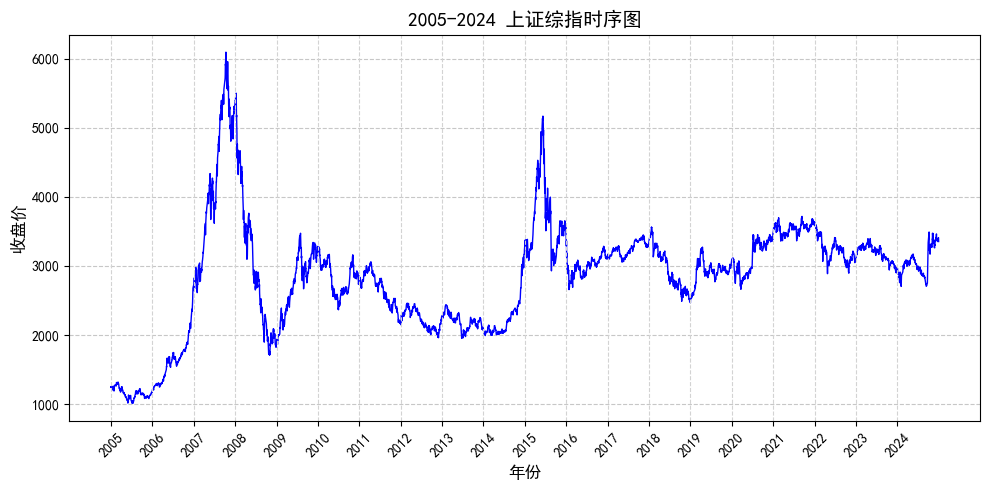

In [ ]:
import pandas as pd
import akshare as ak

import matplotlib.pyplot as plt

# 获取上证指数的历史数据
sz_index = ak.stock_zh_index_daily(symbol="sh000001")  # 上证指数代码为 "sh000001"

# 重命名列名以便后续处理
sz_index.rename(columns={'date': 'day', 'close': 'close'}, inplace=True)

# 将日期列转换为 datetime 类型
sz_index['day'] = pd.to_datetime(sz_index['day'])

# 计算年份列
sz_index['year'] = sz_index['day'].dt.year

# 筛选 2005-2024 年的数据
filtered_data = sz_index[(sz_index['year'] >= 2005) & (sz_index['year'] <= 2024)]

# 绘制时序图
plt.figure(figsize=(10, 5))
plt.plot(filtered_data['day'], filtered_data['close'], color='blue', linewidth=1)

# 添加每年的纵向虚线
years = filtered_data['year'].unique()
for year in years:
    year_start = filtered_data[filtered_data['year'] == year]['day'].iloc[0]
    plt.axvline(x=year_start, color='lightgrey', linestyle='--', linewidth=0.8)

# 设置横轴刻度为每年的起始日期
xticks = [filtered_data[filtered_data['year'] == year]['day'].iloc[0] for year in years]
plt.xticks(xticks, labels=years, rotation=45, fontsize=10)

# 添加标题和标签
plt.title("2005-2024 上证综指时序图", fontsize=14)
plt.xlabel("年份", fontsize=12)
plt.ylabel("收盘价", fontsize=12)

# 添加 y 轴网格线
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()